In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [22]:
class GetVolt():
    def __init__(self, avg=14.4, std=4):
        self.avg = avg
        self.std = std
    
    def generate(self):
        w = 0 + self.std*np.random.randn(1)
        z = self.avg + w
        return z.item()

In [34]:
class SimpleKalman():
    def __init__(self):
        # check first run
        self.isfirst = True
        
        # initialize system model variables
        self.A = 1
        self.H = 1
        self.Q = 0
        self.R = 4
        
        # initial value
        self.x = 14
        self.P = 6
        
    def update(self, z):
        xp = self.A*self.x # predict estimation
        Pp = self.A*self.P*self.A + self.Q # predict error covariance
        
        # update Kalman gain
        K = Pp*self.H / (self.H*Pp*self.H + self.R) 
        
        # calculate estimation
        self.x = xp + K*(z - self.H*xp)
        
        # calculate error covariance
        self.P = Pp - K*self.H*Pp
        
        return self.x
        

In [35]:
Nsamples = 50
t = np.arange(0, 0.2*Nsamples, 0.2)

# container for filtered data
Xsaved = np.zeros(Nsamples)

# container for measured data
Zsaved = np.zeros(Nsamples)

simple_kalman = SimpleKalman() 

get_volt = GetVolt()

for idx in range(Nsamples):
    z = get_volt.generate()
    volt = simple_kalman.update(z)
    
    Xsaved[idx] = volt
    Zsaved[idx] = z

Text(0, 0.5, 'voltage (V)')

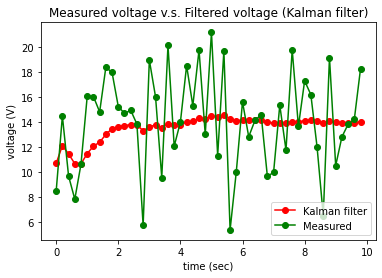

In [44]:
plt.plot(t, Xsaved, 'ro-', label='Kalman filter')
plt.plot(t, Zsaved, 'go-', label='Measured')
plt.legend(loc='lower right')
plt.title('Measured voltage v.s. Filtered voltage (Kalman filter)')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')

In [46]:
class SimpleKalman2():
    def __init__(self):
        # check first run
        self.isfirst = True
        
        # initialize system model variables
        self.A = 1
        self.H = 1
        self.Q = 0
        self.R = 4
        
        # initial value
        self.x = 14
        self.P = 6
        
    def update(self, z):
        xp = self.A*self.x # predict estimation
        Pp = self.A*self.P*self.A + self.Q # predict error covariance
        
        # update Kalman gain
        self.K = Pp*self.H / (self.H*Pp*self.H + self.R) 
        
        # calculate estimation
        self.x = xp + self.K*(z - self.H*xp)
        
        # calculate error covariance
        self.P = Pp - self.K*self.H*Pp
        
        return [self.x, self.P, self.K]
        

In [47]:
Nsamples = 50
t = np.arange(0, 0.2*Nsamples, 0.2)

# container for filtered data
Xsaved = np.zeros((Nsamples, 3))

# container for measured data
Zsaved = np.zeros(Nsamples)

simple_kalman = SimpleKalman2() 

get_volt = GetVolt()

for idx in range(Nsamples):
    z = get_volt.generate()
    
    Xsaved[idx, :] = simple_kalman.update(z)
    Zsaved[idx] = z

Text(0, 0.5, 'Kalman Gain (K)')

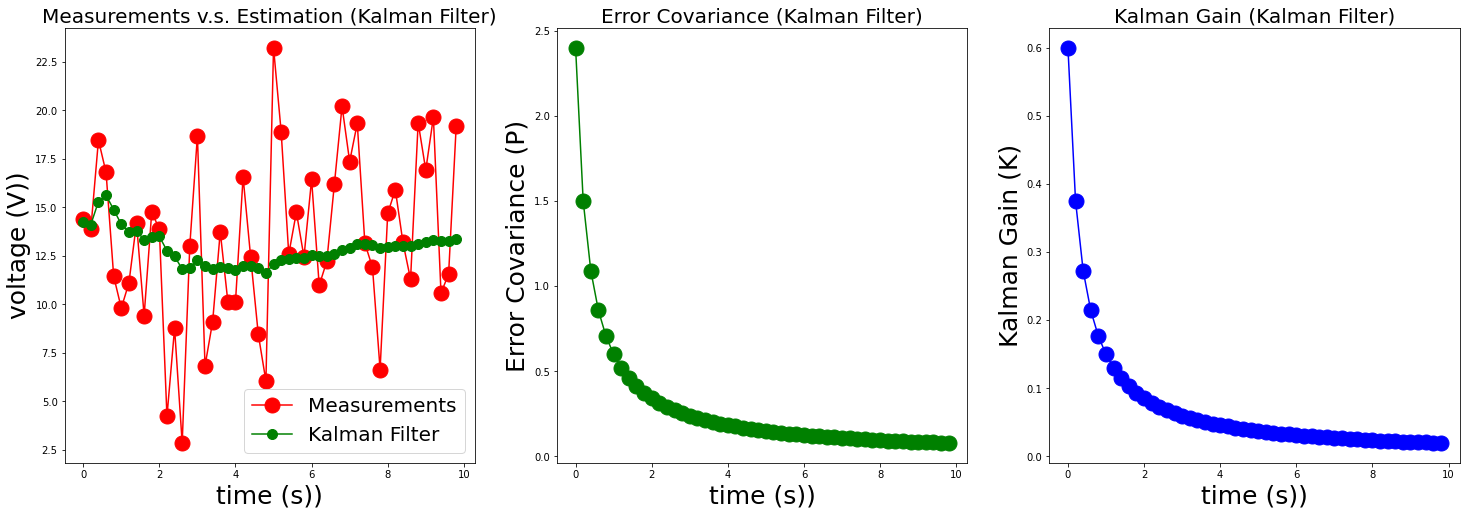

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

plt.subplot(1, 3, 1)
plt.plot(t, Zsaved, 'ro-', label='Measurements', markersize=15)
plt.plot(t, Xsaved[:, 0], 'go-', label='Kalman Filter', markersize=10)
plt.legend(loc='lower right', fontsize=20)
plt.title('Measurements v.s. Estimation (Kalman Filter)', fontsize=20)
plt.xlabel('time (s))', fontsize=25)
plt.ylabel('voltage (V))', fontsize=25)

plt.subplot(1, 3, 2)
plt.plot(t, Xsaved[:, 1], 'go-', markersize=15)
plt.title('Error Covariance (Kalman Filter)', fontsize=20)
plt.xlabel('time (s))', fontsize=25)
plt.ylabel('Error Covariance (P)', fontsize=25)

plt.subplot(1, 3, 3)
plt.plot(t, Xsaved[:, 2], 'bo-', markersize=15)
plt.title('Kalman Gain (Kalman Filter)', fontsize=20)
plt.xlabel('time (s))', fontsize=25)
plt.ylabel('Kalman Gain (K)', fontsize=25)